In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the dataset
gesture_df = pd.read_csv('gestures_df.csv')
gesture_df.sample(5)

,image_path,joint0_x,joint0_y,joint0_z,joint1_x,joint1_y,joint1_z,joint2_x,joint2_y,joint2_z,...,joint18_x,joint18_y,joint18_z,joint19_x,joint19_y,joint19_z,joint20_x,joint20_y,joint20_z,gesture_label
4897,pre_processed_v1\two_up\e4968dbc-e056-47b3-848...,0.400560,0.410222,1.558192e-07,0.409579,0.381555,-0.002231,0.408585,0.358600,-0.001294,...,0.377585,0.354165,-0.004868,0.383460,0.363225,-0.003923,0.387962,0.372296,-0.001326,two_up
30947,pre_processed_v1\rock\3a5bf795-ef86-49d1-b072-...,0.720593,0.391812,-1.008830e-07,0.691021,0.384285,-0.015693,0.665040,0.354935,-0.025102,...,0.720722,0.261545,-0.030907,0.715371,0.240472,-0.031127,0.710839,0.216409,-0.027551,rock
67861,pre_processed_v1\two_up\3c459c64-9c91-4692-809...,0.308618,0.547392,2.546184e-07,0.333839,0.532971,-0.010794,0.351575,0.500769,-0.013755,...,0.291297,0.463746,-0.027090,0.297396,0.487087,-0.024579,0.301749,0.503898,-0.018163,two_up
60704,pre_processed_v1\like\ad43ccbf-7954-44ce-a41f-...,0.598958,0.693184,-2.305675e-08,0.594444,0.651372,-0.003902,0.581434,0.619456,-0.008544,...,0.527147,0.707092,-0.007712,0.534667,0.705386,-0.003303,0.542687,0.707767,-0.000247,like
19738,pre_processed_v1\rock\b556d1d5-1e2b-466b-acce-...,0.218882,0.495470,-1.057269e-07,0.251272,0.475840,-0.007302,0.274072,0.443312,-0.010070,...,0.197404,0.352333,-0.021999,0.195935,0.330151,-0.021996,0.195870,0.308129,-0.019804,rock


In [10]:
new_gesture_df  = gesture_df.drop(['image_path', 'gesture_label'], axis=1)
new_gesture_df.values.min()

-0.4238622188568115

In [9]:
gesture_df = gesture_df.drop('image_path', axis=1)
gesture_df['gesture_label'] = gesture_df['gesture_label'].astype('category') # Convert gesture_label to category for better performance
gesture_df.sample(5)

,joint0_x,joint0_y,joint0_z,joint1_x,joint1_y,joint1_z,joint2_x,joint2_y,joint2_z,joint3_x,...,joint18_x,joint18_y,joint18_z,joint19_x,joint19_y,joint19_z,joint20_x,joint20_y,joint20_z,gesture_label
55917,0.300758,0.628661,3.644462e-07,0.314906,0.610341,-0.014834,0.315603,0.580824,-0.020110,0.297306,...,0.273367,0.549205,-0.025802,0.276812,0.561637,-0.029447,0.279676,0.574005,-0.030013,three
41766,0.730456,0.309894,4.459923e-07,0.696637,0.311719,-0.018846,0.664168,0.295544,-0.031795,0.638454,...,0.743624,0.195319,-0.048311,0.743761,0.218593,-0.044579,0.738730,0.239744,-0.037474,three2
37576,0.757866,0.406435,2.619002e-07,0.805950,0.378604,-0.006197,0.828634,0.329201,-0.010194,0.826013,...,0.713292,0.231569,-0.032848,0.714864,0.196337,-0.035755,0.717977,0.167842,-0.036513,palm
20061,0.483476,0.434107,-4.733946e-08,0.498735,0.457883,-0.002712,0.514247,0.476345,-0.006761,0.524673,...,0.543609,0.410118,-0.012558,0.536526,0.419931,-0.008370,0.528035,0.421262,-0.004456,dislike
45789,0.320879,0.542716,4.317650e-07,0.354538,0.518566,-0.021535,0.380994,0.476799,-0.031349,0.406814,...,0.262419,0.434718,-0.044593,0.273544,0.459786,-0.044403,0.283328,0.483048,-0.037698,three2


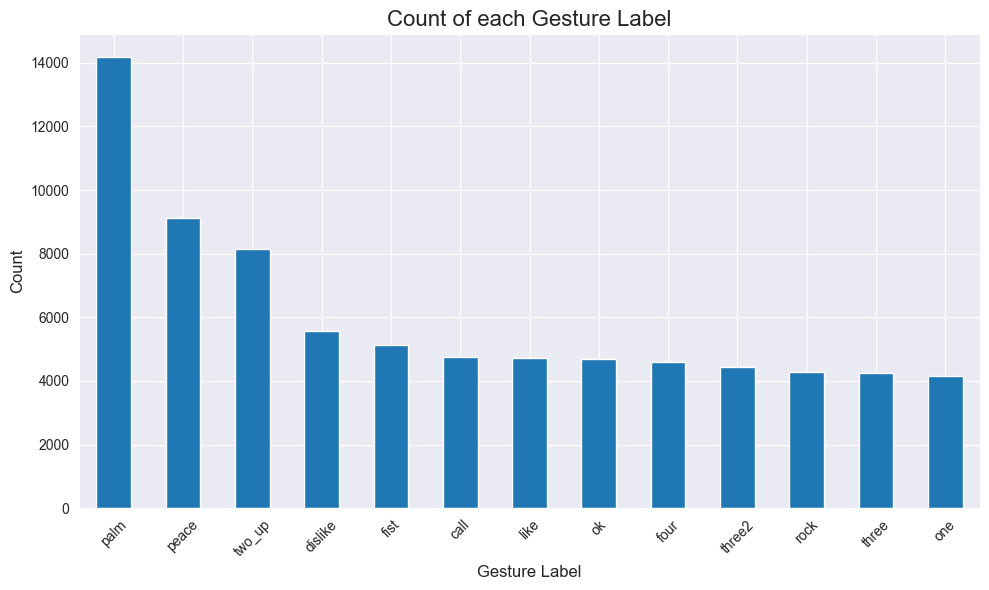

In [10]:
label_counts = gesture_df['gesture_label'].value_counts()

# Plot the counts using a bar chart
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')

# Adding titles and labels
plt.title('Count of each Gesture Label', fontsize=16)
plt.xlabel('Gesture Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

In [11]:
X = gesture_df.drop('gesture_label', axis=1)
y = gesture_df['gesture_label']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [14]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=22)
rf_model.fit(X_train, y_train)

train_preds_rf = rf_model.predict(X_train)
test_preds_rf = rf_model.predict(X_test)

print("Random Forest - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, train_preds_rf)}")
print(classification_report(y_train, train_preds_rf))

print("Random Forest - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_preds_rf)}")
print(classification_report(y_test, test_preds_rf))

Random Forest - Train Set Performance:
Accuracy: 0.9999817030775423
              precision    recall  f1-score   support

        call       1.00      1.00      1.00      3349
     dislike       1.00      1.00      1.00      3888
        fist       1.00      1.00      1.00      3589
        four       1.00      1.00      1.00      3179
        like       1.00      1.00      1.00      3307
          ok       1.00      1.00      1.00      3325
         one       1.00      1.00      1.00      2915
        palm       1.00      1.00      1.00      9965
       peace       1.00      1.00      1.00      6398
        rock       1.00      1.00      1.00      2994
       three       1.00      1.00      1.00      2980
      three2       1.00      1.00      1.00      3109
      two_up       1.00      1.00      1.00      5656

    accuracy                           1.00     54654
   macro avg       1.00      1.00      1.00     54654
weighted avg       1.00      1.00      1.00     54654

Random Fore

In [15]:
# Support Vector Classifier
from sklearn.svm import SVC

svc_model = SVC(random_state=22)
svc_model.fit(X_train, y_train)

train_preds_svc = svc_model.predict(X_train)
test_preds_svc = svc_model.predict(X_test)

print("SVC - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, train_preds_svc)}")
print(classification_report(y_train, train_preds_svc))

print("SVC - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_preds_svc)}")
print(classification_report(y_test, test_preds_svc))

SVC - Train Set Performance:
Accuracy: 0.8514655834888571
              precision    recall  f1-score   support

        call       0.84      0.89      0.87      3349
     dislike       0.98      0.96      0.97      3888
        fist       0.97      0.98      0.97      3589
        four       0.98      0.59      0.73      3179
        like       0.77      0.83      0.80      3307
          ok       1.00      0.97      0.98      3325
         one       0.97      0.96      0.96      2915
        palm       0.85      0.99      0.92      9965
       peace       0.64      0.68      0.66      6398
        rock       1.00      0.96      0.98      2994
       three       0.99      0.91      0.95      2980
      three2       0.99      0.82      0.90      3109
      two_up       0.60      0.59      0.59      5656

    accuracy                           0.85     54654
   macro avg       0.89      0.86      0.87     54654
weighted avg       0.86      0.85      0.85     54654

SVC - Test Set Perfor

In [18]:
# XGBoost Classifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

xgb_model = XGBClassifier(n_estimators=100, eval_metric='mlogloss', random_state=22)
xgb_model.fit(X_train, y_train_encoded)

train_preds_xgb = xgb_model.predict(X_train)
test_preds_xgb = xgb_model.predict(X_test)

print("XGBoost - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train_encoded, train_preds_xgb)}")
print(classification_report(y_train_encoded, train_preds_xgb, target_names=label_encoder.classes_))

print("XGBoost - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test_encoded, test_preds_xgb)}")
print(classification_report(y_test_encoded, test_preds_xgb, target_names=label_encoder.classes_))

XGBoost - Train Set Performance:
Accuracy: 0.9986826215830498
              precision    recall  f1-score   support

        call       1.00      1.00      1.00      3349
     dislike       1.00      1.00      1.00      3888
        fist       1.00      1.00      1.00      3589
        four       1.00      1.00      1.00      3179
        like       1.00      1.00      1.00      3307
          ok       1.00      1.00      1.00      3325
         one       1.00      1.00      1.00      2915
        palm       1.00      1.00      1.00      9965
       peace       1.00      0.99      0.99      6398
        rock       1.00      1.00      1.00      2994
       three       1.00      1.00      1.00      2980
      three2       1.00      1.00      1.00      3109
      two_up       0.99      1.00      0.99      5656

    accuracy                           1.00     54654
   macro avg       1.00      1.00      1.00     54654
weighted avg       1.00      1.00      1.00     54654

XGBoost - Test Se

In [19]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=22, max_iter=500)
mlp_model.fit(X_train, y_train)

train_preds_mlp = mlp_model.predict(X_train)
test_preds_mlp = mlp_model.predict(X_test)

print("MLP - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, train_preds_mlp)}")
print(classification_report(y_train, train_preds_mlp))

print("MLP - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_preds_mlp)}")
print(classification_report(y_test, test_preds_mlp))

MLP - Train Set Performance:
Accuracy: 0.9748966223881144
              precision    recall  f1-score   support

        call       0.96      0.98      0.97      3349
     dislike       0.99      0.97      0.98      3888
        fist       0.98      0.98      0.98      3589
        four       0.98      0.97      0.97      3179
        like       0.98      0.95      0.96      3307
          ok       1.00      0.98      0.99      3325
         one       0.89      0.98      0.93      2915
        palm       0.98      0.99      0.99      9965
       peace       0.99      0.96      0.98      6398
        rock       0.99      0.97      0.98      2994
       three       0.98      0.96      0.97      2980
      three2       0.99      0.99      0.99      3109
      two_up       0.95      0.97      0.96      5656

    accuracy                           0.97     54654
   macro avg       0.97      0.97      0.97     54654
weighted avg       0.98      0.97      0.98     54654

MLP - Test Set Perfor

In [20]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

train_preds_knn = knn_model.predict(X_train)
test_preds_knn = knn_model.predict(X_test)

print("KNN - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, train_preds_knn)}")
print(classification_report(y_train, train_preds_knn))

print("KNN - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, test_preds_knn)}")
print(classification_report(y_test, test_preds_knn))

KNN - Train Set Performance:
Accuracy: 0.9181944596918798
              precision    recall  f1-score   support

        call       0.94      0.93      0.94      3349
     dislike       0.96      0.97      0.97      3888
        fist       0.93      0.97      0.95      3589
        four       0.89      0.89      0.89      3179
        like       0.91      0.95      0.93      3307
          ok       0.98      0.92      0.95      3325
         one       0.95      0.95      0.95      2915
        palm       0.93      0.98      0.95      9965
       peace       0.83      0.84      0.83      6398
        rock       0.99      0.94      0.96      2994
       three       0.98      0.89      0.93      2980
      three2       0.99      0.92      0.95      3109
      two_up       0.82      0.81      0.82      5656

    accuracy                           0.92     54654
   macro avg       0.93      0.92      0.92     54654
weighted avg       0.92      0.92      0.92     54654

KNN - Test Set Perfor

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import joblib

In [29]:
def calculate_per_class_accuracy(y_true, y_pred, labels):
    report = classification_report(y_true, y_pred, output_dict=True, target_names=labels)
    per_class_precision = [report[label]['precision'] for label in labels]
    per_class_recall = [report[label]['recall'] for label in labels]
    per_class_f1_score = [report[label]['f1-score'] for label in labels]
    return per_class_precision, per_class_recall, per_class_f1_score

In [34]:
# Draw comparison of train and test accuracy for each model
labels = label_encoder.classes_

def comparision_plot(best_train_pred, y_train, best_test_pred, y_test, labels, model_name):
    train_per_class_precision, train_per_class_recall, train_per_class_f1_score = calculate_per_class_accuracy(y_train, best_train_pred, labels)
    test_per_class_precision, test_per_class_recall, test_per_class_f1_score = calculate_per_class_accuracy(y_test, best_test_pred, labels)
    
    plt.figure(figsize=(14, 8))
    
    plt.subplot(3, 1, 1)
    plt.plot(np.arange(len(labels)), train_per_class_precision, label='Train Precision', color='blue')
    plt.plot(np.arange(len(labels)), test_per_class_precision, label='Test Precision', linestyle='--', color='orange')
    plt.xticks(np.arange(len(labels)), labels)
    plt.ylabel('Precision')
    plt.ylim(0, 1.05)
    plt.title(f'{model_name} - Precision')
    
    plt.subplot(3, 1, 2)
    plt.plot(np.arange(len(labels)), train_per_class_recall, label='Train Recall', color='blue')
    plt.plot(np.arange(len(labels)), test_per_class_recall, label='Test Recall', linestyle='--', color='orange')
    plt.xticks(np.arange(len(labels)), labels)
    plt.ylabel('Recall')
    plt.ylim(0, 1.05)
    plt.title(f'{model_name} - Recall')
    
    plt.subplot(3, 1, 3)
    plt.plot(np.arange(len(labels)), train_per_class_f1_score, label='Train F1 Score', color='blue')
    plt.plot(np.arange(len(labels)), test_per_class_f1_score, label='Test F1 Score', linestyle='--', color='orange')
    plt.xticks(np.arange(len(labels)), labels)
    plt.ylabel('F1 Score')
    plt.ylim(0, 1.05)
    plt.title(f'{model_name} - F1 Score')
    
    plt.tight_layout()
    plt.legend()
    plt.show()

In [24]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=22), 
                               param_grid=param_grid_rf, 
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate the best model
best_rf_train_preds = best_rf_model.predict(X_train)
best_rf_test_preds = best_rf_model.predict(X_test)

print("Best Random Forest - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, best_rf_train_preds)}")
print(classification_report(y_train, best_rf_train_preds))

print("Best Random Forest - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_rf_test_preds)}")
print(classification_report(y_test, best_rf_test_preds))

# Save model to file
joblib.dump(best_rf_model, 'models/best_random_forest_model.pkl')

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest - Train Set Performance:
Accuracy: 0.9999817030775423
              precision    recall  f1-score   support

        call       1.00      1.00      1.00      3349
     dislike       1.00      1.00      1.00      3888
        fist       1.00      1.00      1.00      3589
        four       1.00      1.00      1.00      3179
        like       1.00      1.00      1.00      3307
          ok       1.00      1.00      1.00      3325
         one       1.00      1.00      1.00      2915
        palm       1.00      1.00      1.00      9965
       peace       1.00      1.00      1.00      6398
        rock       1.00      1.00      1.00      2994
       three       1.00      1.00      1.00      2980
      three2       1.00      1.00      1.00      3109
      two_up       1.00      1.00      1.00      5656

    accuracy                           1.00   

['models/best_random_forest_model.pkl']

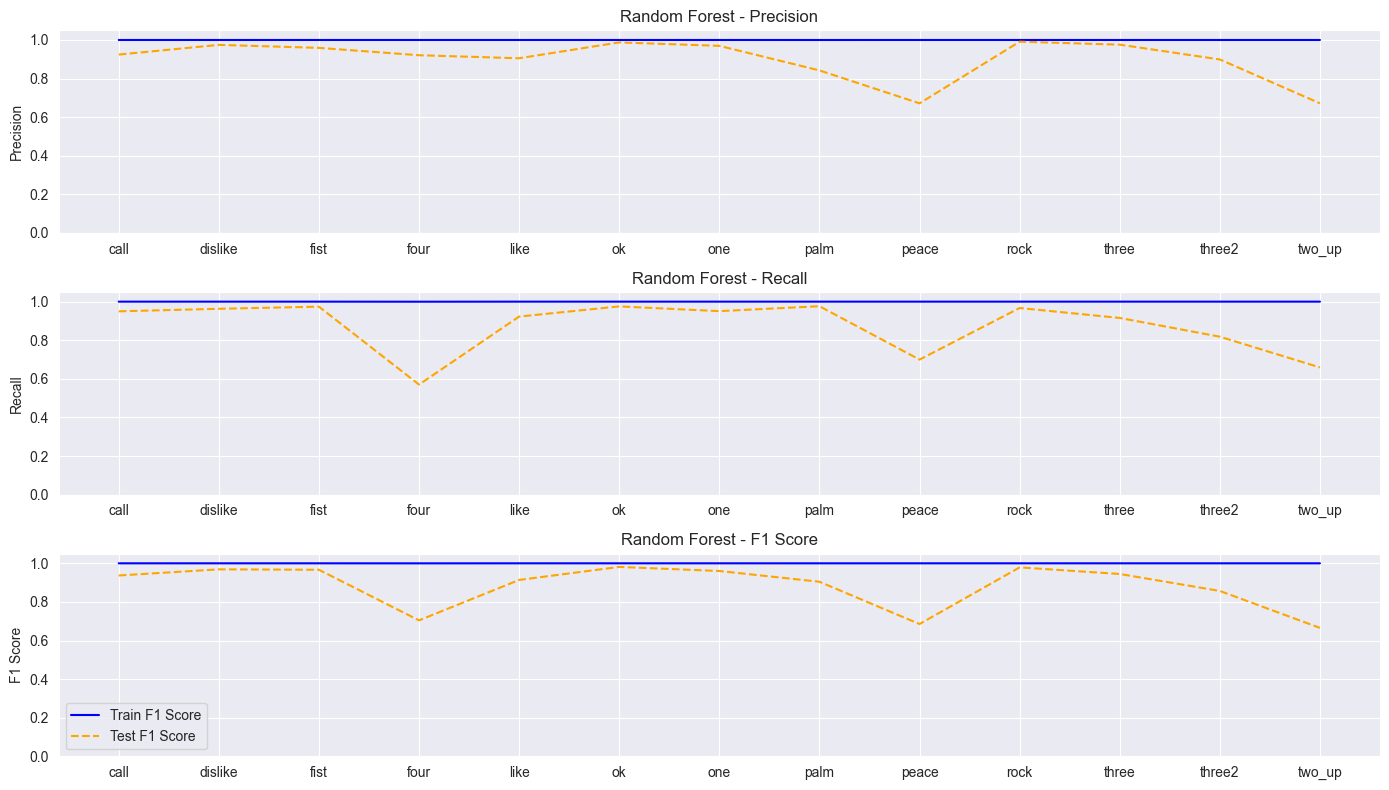

In [35]:
comparision_plot(best_rf_train_preds, y_train, best_rf_test_preds, y_test, labels, model_name='Random Forest')

In [25]:
# Hyperparameter tuning for SVC

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(estimator=SVC(random_state=22), 
                                param_grid=param_grid_svc, 
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1)

grid_search_svc.fit(X_train, y_train)

best_svc_model = grid_search_svc.best_estimator_
print("Best parameters for SVC:", grid_search_svc.best_params_)

# Evaluate the best model
best_svc_train_preds = best_svc_model.predict(X_train)
best_svc_test_preds = best_svc_model.predict(X_test)

print("Best SVC - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, best_svc_train_preds)}")
print(classification_report(y_train, best_svc_train_preds))

print("Best SVC - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_svc_test_preds)}")
print(classification_report(y_test, best_svc_test_preds))

# Save model to file
joblib.dump(best_svc_model, 'models/best_svc_model.pkl')

Best parameters for SVC: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best SVC - Train Set Performance:
Accuracy: 0.9245617887071395
              precision    recall  f1-score   support

        call       0.97      0.97      0.97      3349
     dislike       0.95      0.97      0.96      3888
        fist       0.97      0.98      0.98      3589
        four       0.98      0.81      0.89      3179
        like       0.95      0.96      0.95      3307
          ok       0.99      0.98      0.99      3325
         one       0.97      0.96      0.97      2915
        palm       0.92      0.99      0.95      9965
       peace       0.88      0.76      0.81      6398
        rock       1.00      0.97      0.98      2994
       three       0.99      0.95      0.97      2980
      three2       0.99      0.89      0.94      3109
      two_up       0.74      0.88      0.80      5656

    accuracy                           0.92     54654
   macro avg       0.95      0.93      0.93     54654


['models/best_svc_model.pkl']

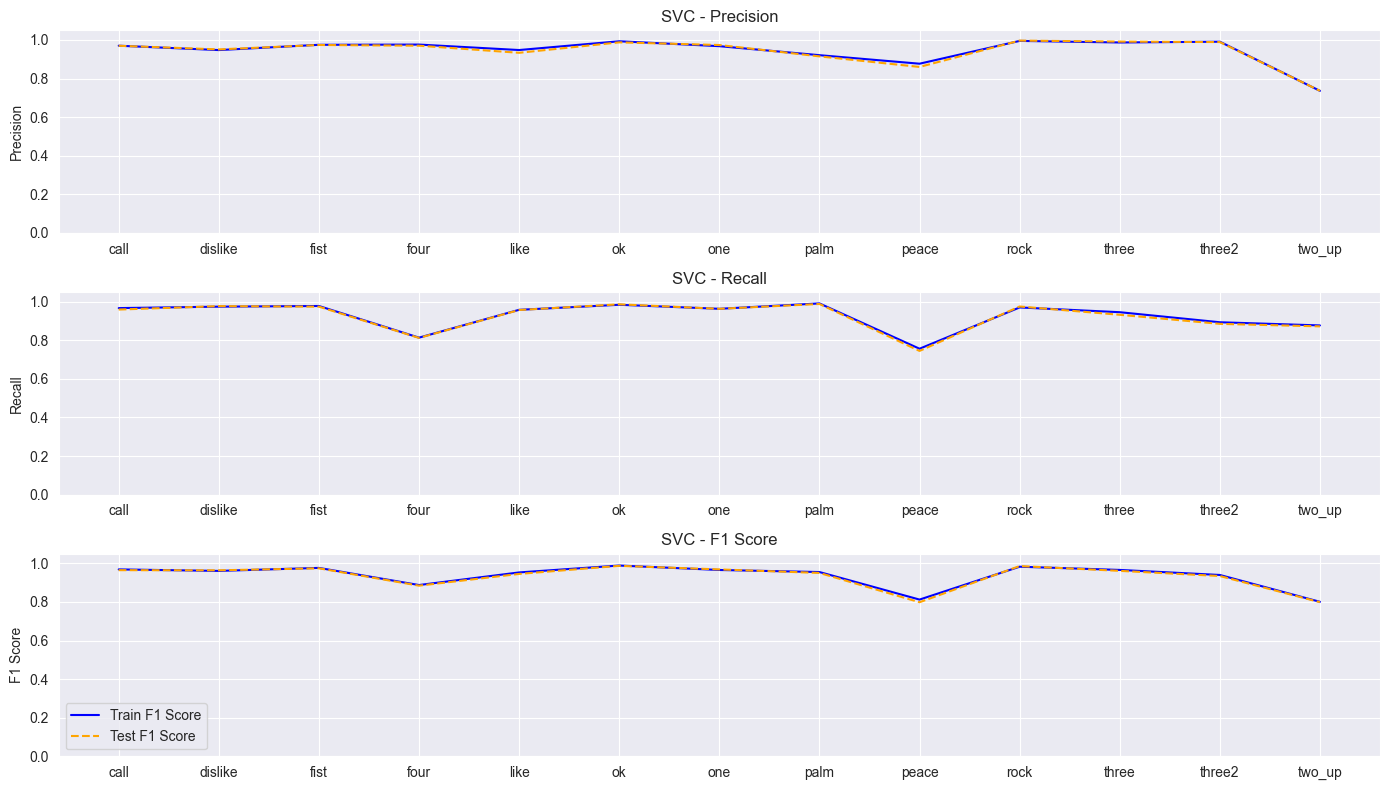

In [36]:
comparision_plot(best_svc_train_preds, y_train, best_svc_test_preds, y_test, labels, model_name='SVC')

In [26]:
# Hyperparameter tuning for XGBoost

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search_xgb = GridSearchCV(estimator=XGBClassifier(eval_metric='mlogloss', random_state=22), 
                                param_grid=param_grid_xgb, 
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1)

grid_search_xgb.fit(X_train, y_train_encoded)

best_xgb_model = grid_search_xgb.best_estimator_
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Evaluate the best model
best_xgb_train_preds = best_xgb_model.predict(X_train)
best_xgb_test_preds = best_xgb_model.predict(X_test)

print("Best XGBoost - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train_encoded, best_xgb_train_preds)}")
print(classification_report(y_train_encoded, best_xgb_train_preds, target_names=label_encoder.classes_))

print("Best XGBoost - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test_encoded, best_xgb_test_preds)}")
print(classification_report(y_test_encoded, best_xgb_test_preds, target_names=label_encoder.classes_))

# Save model to file
joblib.dump(best_xgb_model, 'models/best_xgboost_model.pkl')

Best parameters for XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best XGBoost - Train Set Performance:
Accuracy: 0.9999817030775423
              precision    recall  f1-score   support

        call       1.00      1.00      1.00      3349
     dislike       1.00      1.00      1.00      3888
        fist       1.00      1.00      1.00      3589
        four       1.00      1.00      1.00      3179
        like       1.00      1.00      1.00      3307
          ok       1.00      1.00      1.00      3325
         one       1.00      1.00      1.00      2915
        palm       1.00      1.00      1.00      9965
       peace       1.00      1.00      1.00      6398
        rock       1.00      1.00      1.00      2994
       three       1.00      1.00      1.00      2980
      three2       1.00      1.00      1.00      3109
      two_up       1.00      1.00      1.00      5656

    accuracy                           1.00

['models/best_xgboost_model.pkl']

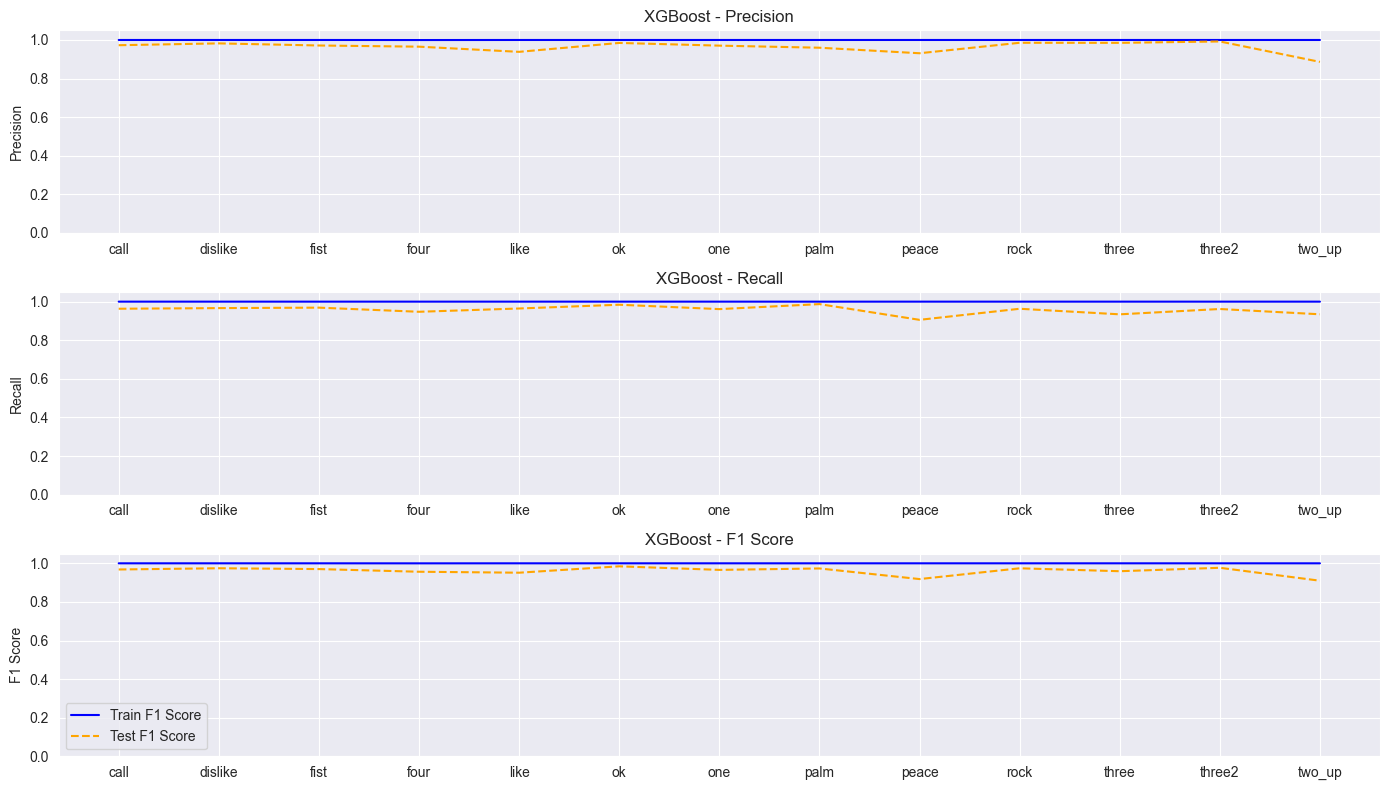

In [37]:
comparision_plot(best_xgb_train_preds, y_train_encoded, best_xgb_test_preds, y_test_encoded, label_encoder.classes_, model_name='XGBoost')

In [42]:
# Save the label encoder to file
joblib.dump(label_encoder, 'models/xgb_label_encoder.pkl')

['models/xgb_label_encoder.pkl']

In [27]:
# Hyperparameter tuning for MLP

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [200, 500, 1000],
}

grid_search_mlp = GridSearchCV(estimator=MLPClassifier(random_state=22), 
                                param_grid=param_grid_mlp, 
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1)

grid_search_mlp.fit(X_train, y_train)

best_mlp_model = grid_search_mlp.best_estimator_
print("Best parameters for MLP:", grid_search_mlp.best_params_)

# Evaluate the best model
best_mlp_train_preds = best_mlp_model.predict(X_train)
best_mlp_test_preds = best_mlp_model.predict(X_test)

print("Best MLP - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, best_mlp_train_preds)}")
print(classification_report(y_train, best_mlp_train_preds))

print("Best MLP - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_mlp_test_preds)}")
print(classification_report(y_test, best_mlp_test_preds))

# Save model to file
joblib.dump(best_mlp_model, 'models/best_mlp_model.pkl')

D:\Dissertation\Dissertation-Code\venv\Lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


Best parameters for MLP: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 1000}
Best MLP - Train Set Performance:
Accuracy: 0.9748966223881144
              precision    recall  f1-score   support

        call       0.96      0.98      0.97      3349
     dislike       0.99      0.97      0.98      3888
        fist       0.98      0.98      0.98      3589
        four       0.98      0.97      0.97      3179
        like       0.98      0.95      0.96      3307
          ok       1.00      0.98      0.99      3325
         one       0.89      0.98      0.93      2915
        palm       0.98      0.99      0.99      9965
       peace       0.99      0.96      0.98      6398
        rock       0.99      0.97      0.98      2994
       three       0.98      0.96      0.97      2980
      three2       0.99      0.99      0.99      3109
      two_up       0.95      0.97      0.96      5656

    accuracy                         

['models/best_mlp_model.pkl']

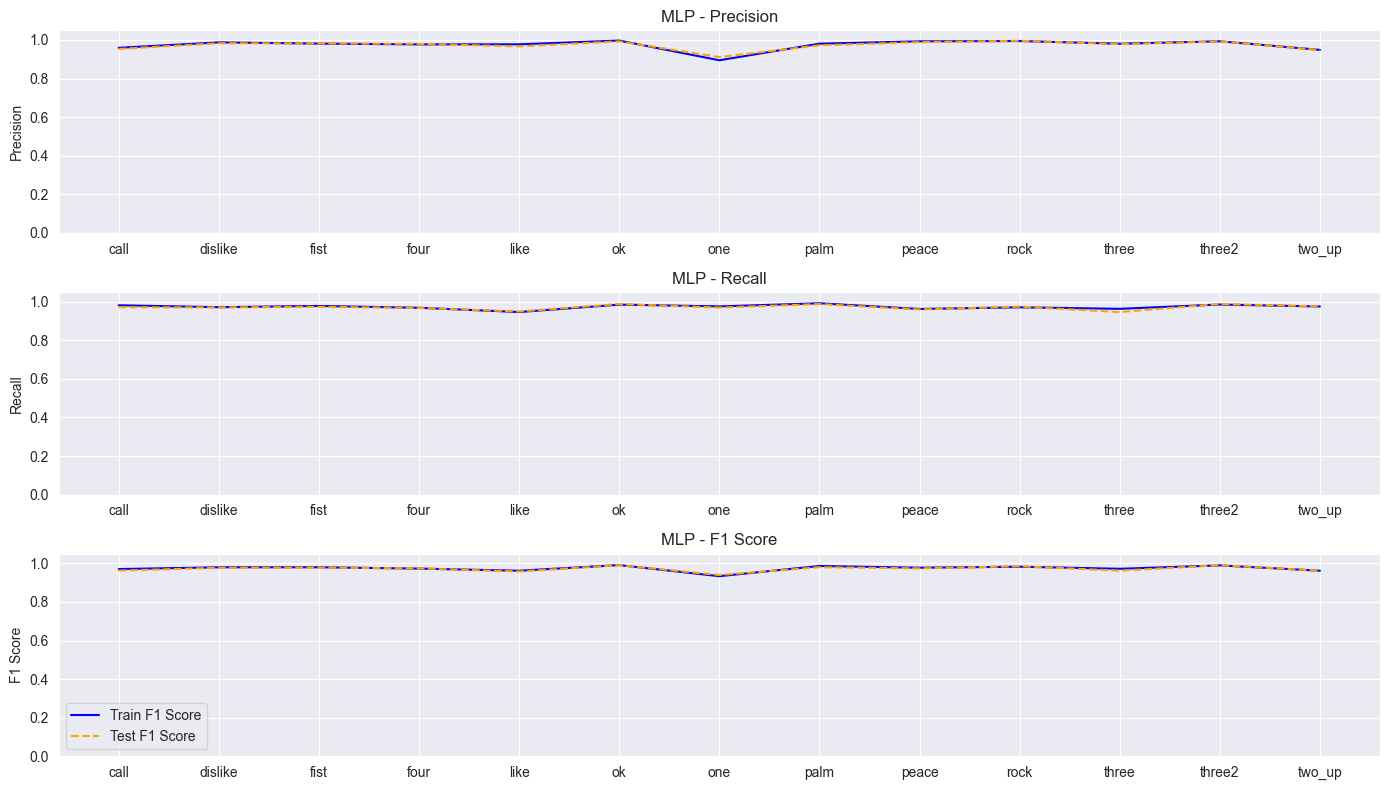

In [38]:
comparision_plot(best_mlp_train_preds, y_train, best_mlp_test_preds, y_test, labels, model_name='MLP')

In [28]:
# Hyperparameter tuning for KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), 
                                param_grid=param_grid_knn, 
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
print("Best parameters for KNN:", grid_search_knn.best_params_)

# Evaluate the best model
best_knn_train_preds = best_knn_model.predict(X_train)
best_knn_test_preds = best_knn_model.predict(X_test)

print("Best KNN - Train Set Performance:")
print(f"Accuracy: {accuracy_score(y_train, best_knn_train_preds)}")
print(classification_report(y_train, best_knn_train_preds))

print("Best KNN - Test Set Performance:")
print(f"Accuracy: {accuracy_score(y_test, best_knn_test_preds)}")
print(classification_report(y_test, best_knn_test_preds))

# Save model to file
joblib.dump(best_knn_model, 'models/best_knn_model.pkl')

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
Best KNN - Train Set Performance:
Accuracy: 0.9999817030775423
              precision    recall  f1-score   support

        call       1.00      1.00      1.00      3349
     dislike       1.00      1.00      1.00      3888
        fist       1.00      1.00      1.00      3589
        four       1.00      1.00      1.00      3179
        like       1.00      1.00      1.00      3307
          ok       1.00      1.00      1.00      3325
         one       1.00      1.00      1.00      2915
        palm       1.00      1.00      1.00      9965
       peace       1.00      1.00      1.00      6398
        rock       1.00      1.00      1.00      2994
       three       1.00      1.00      1.00      2980
      three2       1.00      1.00      1.00      3109
      two_up       1.00      1.00      1.00      5656

    accuracy                           1.00     54654
   macro avg       1.00      1.00  

['models/best_knn_model.pkl']

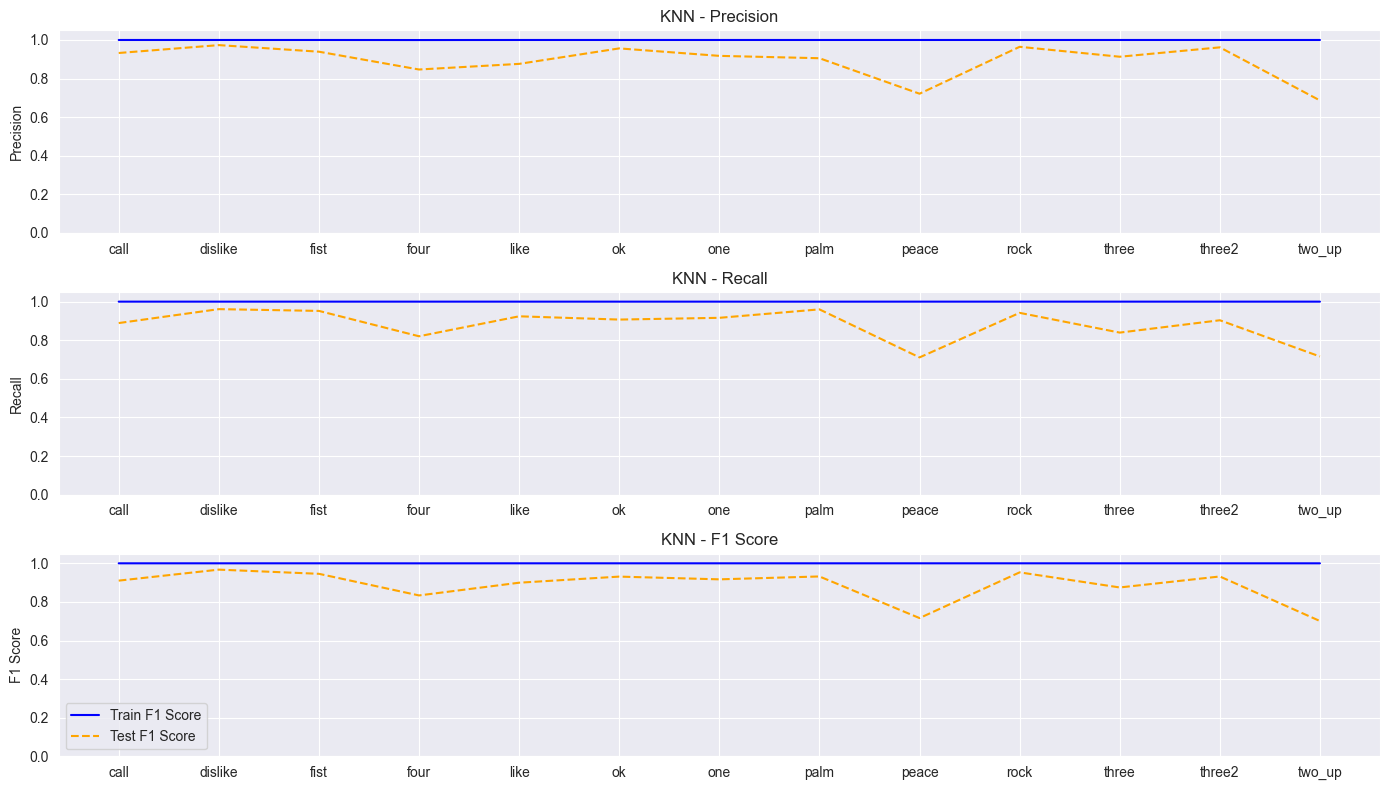

In [39]:
comparision_plot(best_knn_train_preds, y_train, best_knn_test_preds, y_test, labels, model_name='KNN')